In [42]:
import os
import sys
import datetime
import pytz
import pandas as pd
if '../' not in sys.path:
    sys.path.append('../')

In [31]:
from flexlab.db_layer.db_interface import DB_Interface

In [32]:
tz_local = pytz.timezone("US/Pacific")
tz_utc = pytz.timezone("UTC")

In [33]:
db = DB_Interface(config_file='db_interface_config_template_metrics.yaml')

In [67]:
delta=16

et_utc = tz_utc.localize(datetime.datetime.utcnow())
et_local = et_utc.astimezone(tz_local)

st_local = et_local - datetime.timedelta(hours=delta)

threshold_var=delta*4

In [68]:
st_local

datetime.datetime(2021, 9, 10, 8, 38, 35, 550836, tzinfo=<DstTzInfo 'US/Pacific' PDT-1 day, 17:00:00 DST>)

In [69]:
cell_1a_df=db.get_data(st=st_local, et=et_local, cell='1a') # cell can be '1a' or '1b'

cell_1a_df['1A-SAT-SP']





time
2021-09-10 08:45:00    18.333333
2021-09-10 09:00:00    18.333333
2021-09-10 09:15:00    18.333333
2021-09-10 09:30:00    18.333333
2021-09-10 09:45:00    18.333333
2021-09-10 10:00:00    18.333333
2021-09-10 10:15:00    18.333333
2021-09-10 10:30:00    17.666668
2021-09-10 10:45:00    16.000006
2021-09-10 11:00:00    16.000010
2021-09-10 11:15:00    14.666680
2021-09-10 11:30:00    14.666684
2021-09-10 11:45:00    15.083355
2021-09-10 12:00:00    14.583359
2021-09-10 12:15:00    13.750028
2021-09-10 12:30:00    13.333363
2021-09-10 12:45:00          NaN
Freq: 15T, Name: 1A-SAT-SP, dtype: float64

In [70]:
### SET CONDITION FOR ALERT AND CREATE FLAG


cell_1b_df=db.get_data(st=st_local, et=et_local, cell='1b') # cell can be '1a' or '1b'

cell_1b_df['1B-SAT-SP']

cell_1b_df['1B-SAT-SP_flag']=cell_1b_df['1B-SAT-SP']>15.0

cell_1b_df['1B-SAT-SP_flag']=cell_1b_df['1B-SAT-SP_flag'].astype(int)

df1=cell_1b_df['1B-SAT-SP_flag'].diff

df1

<bound method Series.diff of time
2021-09-10 08:45:00    1
2021-09-10 09:00:00    1
2021-09-10 09:15:00    1
2021-09-10 09:30:00    1
2021-09-10 09:45:00    1
2021-09-10 10:00:00    1
2021-09-10 10:15:00    1
2021-09-10 10:30:00    1
2021-09-10 10:45:00    1
2021-09-10 11:00:00    1
2021-09-10 11:15:00    1
2021-09-10 11:30:00    1
2021-09-10 11:45:00    1
2021-09-10 12:00:00    0
2021-09-10 12:15:00    0
2021-09-10 12:30:00    0
2021-09-10 12:45:00    0
Freq: 15T, Name: 1B-SAT-SP_flag, dtype: int64>

OK


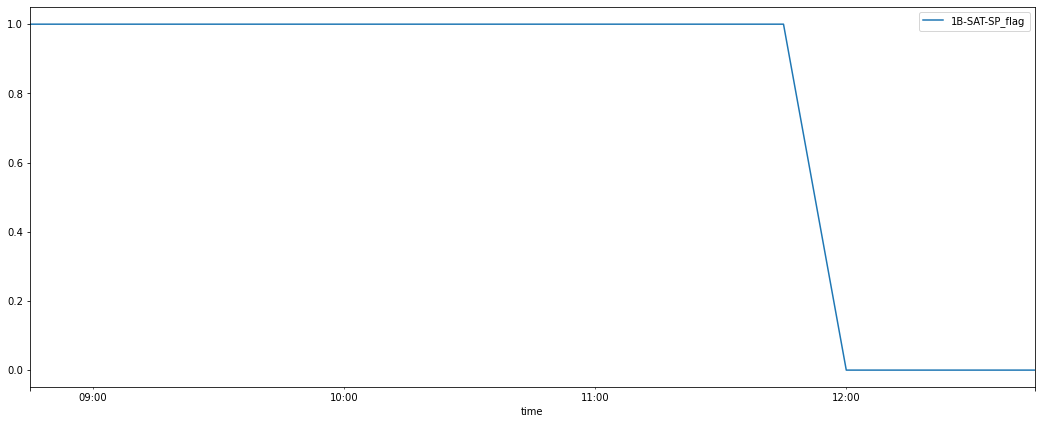

In [75]:
cell_1b_df['1B-SAT-SP_flag'].plot(figsize=(18,7), legend=True)

if cell_1b_df['1B-SAT-SP_flag'].sum()>threshold_var:
    print(cell_1b_df['1B-SAT-SP_flag'].sum())
    print(alert)
else:
    print('OK')
    
#### NEXT STEP IS TO PUSH THIS FLAG - HOW CAN I PUSH FLAG TO GRAFANA PANEL TO SET UP ALERTS???